# Análise de imoveis na cidade de bostom

Esse notbook tem como objeto efetuar a analise do dataset de imóveis da cidade de bostom a fim de identificar padrões e gerar um modelo que consiga predizer novos preços para os novos imóveis.

## Carregamento dos dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

rcParams['figure.figsize'] = 12,8
plt.style.use('ggplot')

data = load_boston()

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.columns = ['TaxaCrime', 'ProporcaoTerrenosResidZoneados', 'ProporcaoTerrenoNaoComercial', 'PertoRio', 'ConcentracaoOxidoNitrico', 'QuantMediaQuartos', 'IdadeDoImovel', 'DistanciaPonderadaCentrosEmpresarias', 'IndiceAcessoRodoviasRadiais', 'TaxaImpostoPropriedade', 'ProporcaoAlunoProfessor', 'ProporcaoNegros', 'PercentualStatusInferiorPopulacao']
df['Preco'] = data['target']

In [3]:
df.head()

,TaxaCrime,ProporcaoTerrenosResidZoneados,ProporcaoTerrenoNaoComercial,PertoRio,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,ProporcaoAlunoProfessor,ProporcaoNegros,PercentualStatusInferiorPopulacao,Preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   TaxaCrime                             506 non-null    float64
 1   ProporcaoTerrenosResidZoneados        506 non-null    float64
 2   ProporcaoTerrenoNaoComercial          506 non-null    float64
 3   PertoRio                              506 non-null    float64
 4   ConcentracaoOxidoNitrico              506 non-null    float64
 5   QuantMediaQuartos                     506 non-null    float64
 6   IdadeDoImovel                         506 non-null    float64
 7   DistanciaPonderadaCentrosEmpresarias  506 non-null    float64
 8   IndiceAcessoRodoviasRadiais           506 non-null    float64
 9   TaxaImpostoPropriedade                506 non-null    float64
 10  ProporcaoAlunoProfessor               506 non-null    float64
 11  ProporcaoNegros    

## Analise estatistica das informações

In [5]:
df.describe()

,TaxaCrime,ProporcaoTerrenosResidZoneados,ProporcaoTerrenoNaoComercial,PertoRio,ConcentracaoOxidoNitrico,QuantMediaQuartos,IdadeDoImovel,DistanciaPonderadaCentrosEmpresarias,IndiceAcessoRodoviasRadiais,TaxaImpostoPropriedade,ProporcaoAlunoProfessor,ProporcaoNegros,PercentualStatusInferiorPopulacao,Preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Análise das features

### Taxa de crime

O indice de crime é homogêneo ?

O preço da casa é afetado pela taxa de crime ?

In [6]:
df['TaxaCrime'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: TaxaCrime, dtype: float64

In [7]:
print('Media: %s' % df['TaxaCrime'].mean())
print('Mediana: %s' % df['TaxaCrime'].median())
print('Moda: %s' % df['TaxaCrime'].mode()[0])

Media: 3.6135235573122535
Mediana: 0.25651
Moda: 0.01501


In [8]:
df['TaxaCrime'].mode()[0] < df['TaxaCrime'].median() < df['TaxaCrime'].mean()

True

#### Analise de distribuição da taxa de crime.

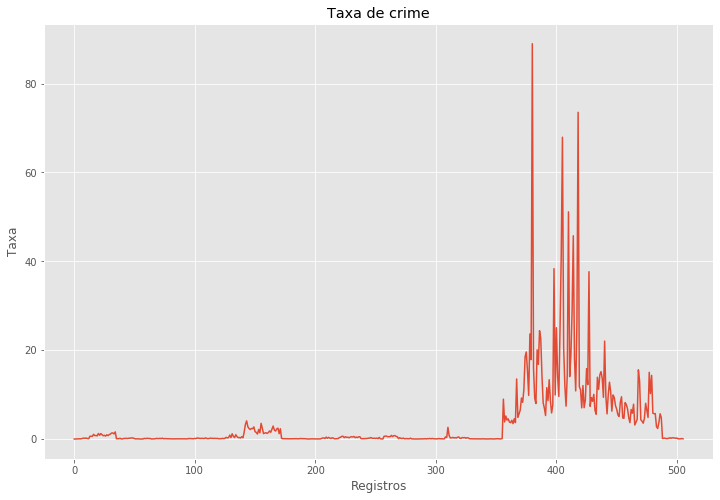

In [9]:
plt.title('Taxa de crime')
plt.plot(df['TaxaCrime'])
plt.xlabel('Registros')
plt.ylabel('Taxa')
plt.show()

Text(2, 0.29, 'Taxa de assimetria 5.22')

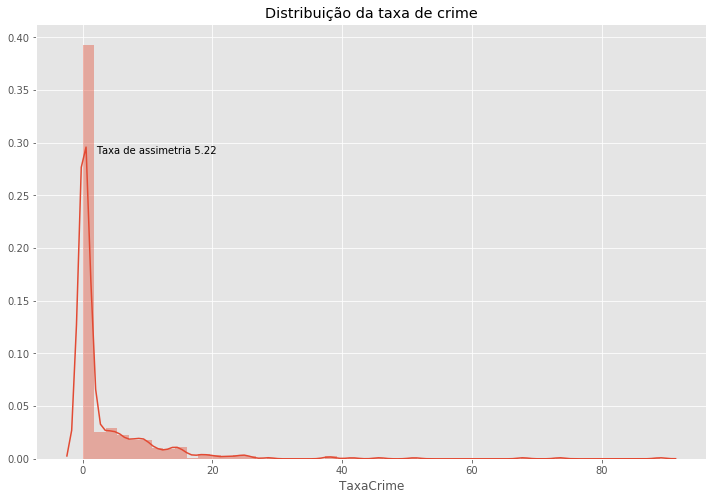

In [10]:
plt.title('Distribuição da taxa de crime')
sns.distplot(df['TaxaCrime'])
assimetria = round(df['TaxaCrime'].skew(), 2)
plt.text(x=2, y=0.29, s= f'Taxa de assimetria {assimetria}' )

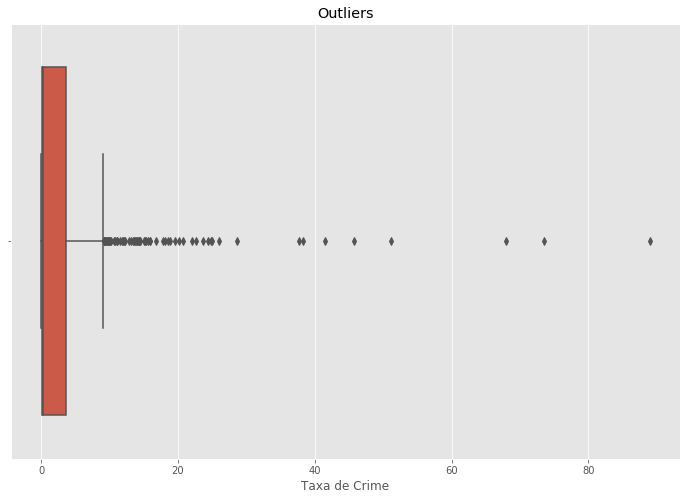

In [11]:
plt.title('Outliers')
sns.boxplot(df['TaxaCrime'])
plt.xlabel('Taxa de Crime')
plt.show()

> O indice de crime é homogeneo ?

Não. Nota-se que a distribuição é assimétrica à esquerda, concentrando a maior parte dos dados perto da média mas com diferenças entre a mediana e a moda. Essa caracteristica tem que a moda < mediana < média.


#### O índice de crime esta relacionada com a variavel alvo (preco) ?

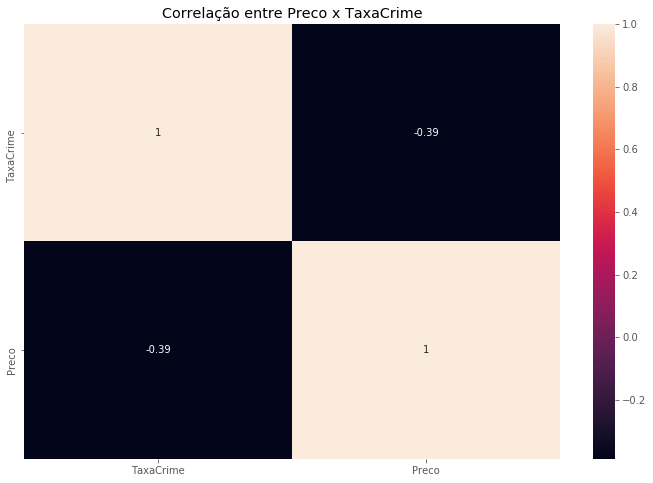

In [12]:
corr = df[['TaxaCrime', 'Preco']].corr()

plt.title('Correlação entre Preco x TaxaCrime')
sns.heatmap(corr, annot=True)
plt.show()

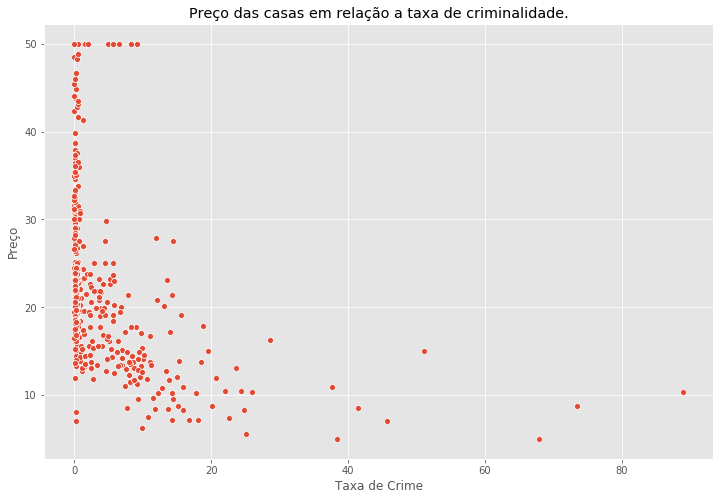

In [13]:
plt.title('Preço das casas em relação a taxa de criminalidade.')
sns.scatterplot(x='TaxaCrime', y='Preco', data=df)
plt.xlabel('Taxa de Crime')
plt.ylabel('Preço')
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

X = df['TaxaCrime'].values.reshape(-1,1)
X_poly = poly.fit_transform(X)

In [15]:
y = df['Preco'].values.reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.intercept_, model.coef_

(array([24.92811419]), array([[ 0.        , -0.87614063,  0.00886842]]))

In [18]:
X_new = np.linspace(0, len(X), len(X)).reshape(len(X),1)
X_new_poly = poly.transform(X_new)

y_pred = model.predict(X_new_poly)

In [19]:
model = LinearRegression()
model.fit(X, y)

y_pred2 = model.predict(X_new)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Previsão Polinomial')
print('\nErro Medio Quadrado: %s' % mean_squared_error(y, y_pred))
print('\nErro Medio Absoluto: %s' % mean_absolute_error(y, y_pred))

print('')
print('Previsão Linear')
print('\nErro Medio Quadrado: %s' % mean_squared_error(y, y_pred2))
print('\nErro Medio Absoluto: %s' % mean_absolute_error(y, y_pred2))

Previsão Polinomial

Erro Medio Quadrado: 601495.6087160525

Erro Medio Absoluto: 542.9860165646367

Previsão Linear

Erro Medio Quadrado: 14245.089375422904

Erro Medio Absoluto: 103.60290347238876


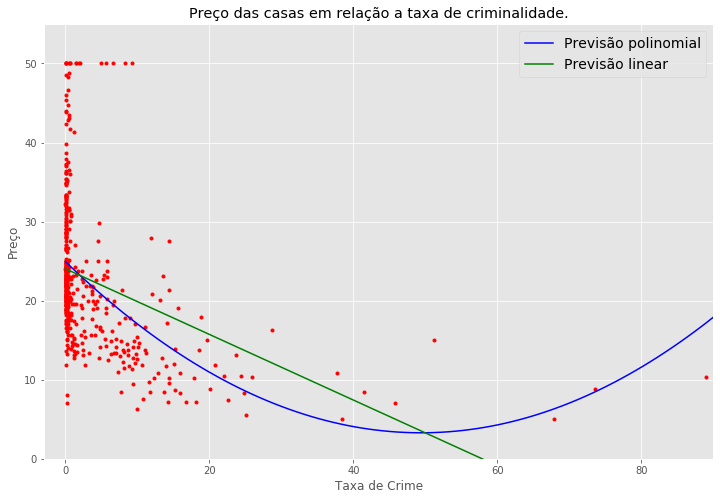

In [21]:
plt.title('Preço das casas em relação a taxa de criminalidade.')
plt.plot(X, y, 'r.')
plt.plot(X_new, y_pred, 'b-', label='Previsão polinomial')
plt.plot(X_new, y_pred2, 'g-', label='Previsão linear')
plt.xlabel('Taxa de Crime')
plt.ylabel('Preço')
plt.axis([-3,90,0,55])
plt.legend(loc='upper rigth', fontsize=14)
plt.show()

> O índice de crime esta relacionada com a variavel alvo (preco) ?

Podemos notar que a taxa de crime possui uma fraca dependência (correlação) negativa em relação ao preco do imovel, ou seja, conforme o preco da casa aumenta a taxa de crime diminui, mas não possuimos evidências suficientes para sustentar esse argumento, ou seja, a correlação não implica na causalidade. 

Podemos testar também através das regressões (linear e polinomial) que o modelo não possui uma taxa de erro baixa devido analise considerar apenas uma variável que por si só não consegue explicar essa relação.

### Análise da proporção dos terrenos zoneados

* A proporção esta distribuida de forma homogênea ?

* A proporção esta relacionada ao preço dos imoveis ?

#### A proporção esta distribuida de forma homogênea ?

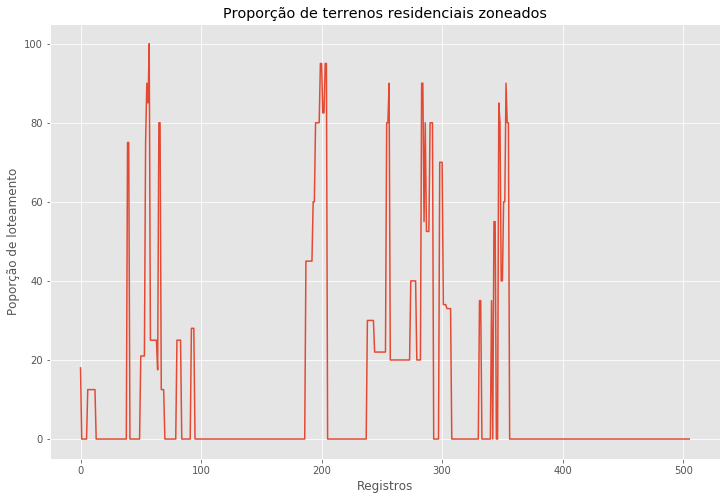

In [23]:
plt.title('Proporção de terrenos residenciais zoneados')
plt.plot(df['ProporcaoTerrenosResidZoneados'])
plt.xlabel('Registros')
plt.ylabel('Poporção de loteamento')
plt.show()

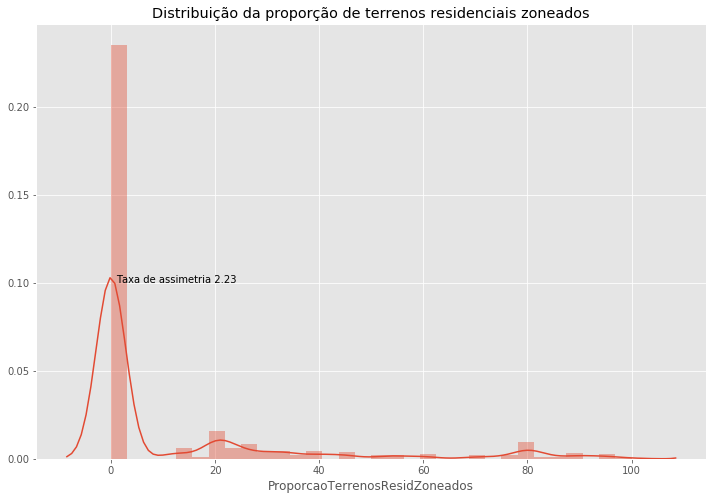

In [30]:
plt.title('Distribuição da proporção de terrenos residenciais zoneados')
sns.distplot(df['ProporcaoTerrenosResidZoneados'])
assimetria = round(df['ProporcaoTerrenosResidZoneados'].skew(), 2)
plt.text(x=1, y=0.10, s= f'Taxa de assimetria {assimetria}' )
plt.show()

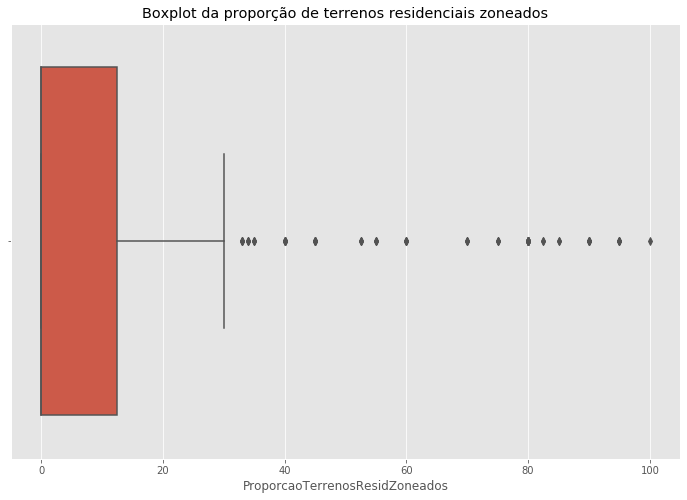

In [31]:
plt.title('Boxplot da proporção de terrenos residenciais zoneados')
sns.boxplot(df['ProporcaoTerrenosResidZoneados'])
plt.show()

> A proporção esta distribuida de forma homogênea.

Não. Nota-se que a distribuição é assimétrica à esquerda, concentrando a maior parte dos dados perto da média mas com diferenças entre a mediana e a moda. Essa caracteristica tem que a moda < mediana < média.

#### A proporção esta relacionada ao preço dos imoveis ?

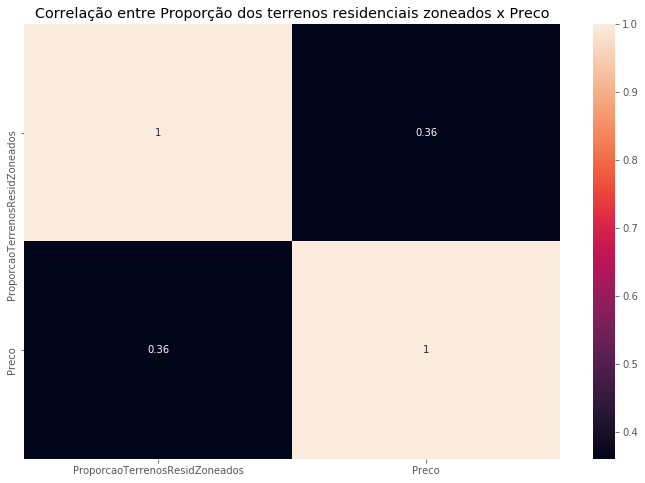

In [33]:
corr = df[['ProporcaoTerrenosResidZoneados', 'Preco']].corr()

plt.title('Correlação entre Proporção dos terrenos residenciais zoneados x Preco')
sns.heatmap(corr, annot=True)
plt.show()

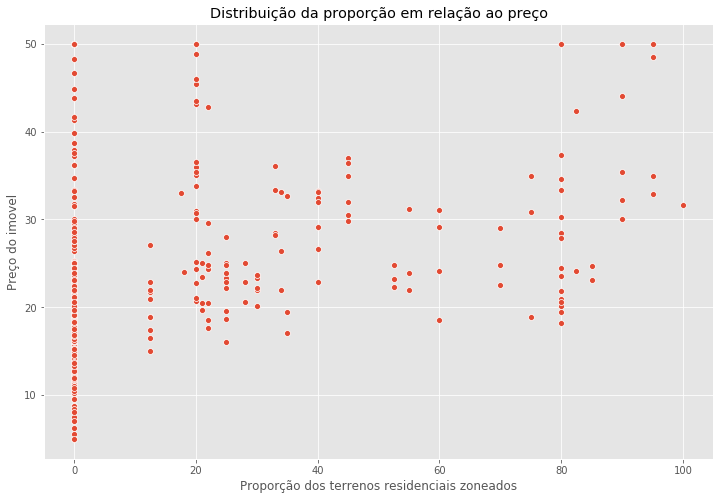

In [35]:
plt.title('Distribuição da proporção em relação ao preço')
sns.scatterplot(x='ProporcaoTerrenosResidZoneados', y='Preco', data=df)
plt.xlabel('Proporção dos terrenos residenciais zoneados')
plt.ylabel('Preço do imovel')
plt.show()

In [42]:
model = LinearRegression()

X = df['ProporcaoTerrenosResidZoneados'].values.reshape(-1,1)
y = df['Preco'].values.reshape(-1,1)

model.fit(X, y)

X_new = np.linspace(0, len(X), len(X)).reshape(len(X),1)

y_pred = model.predict(X_new)

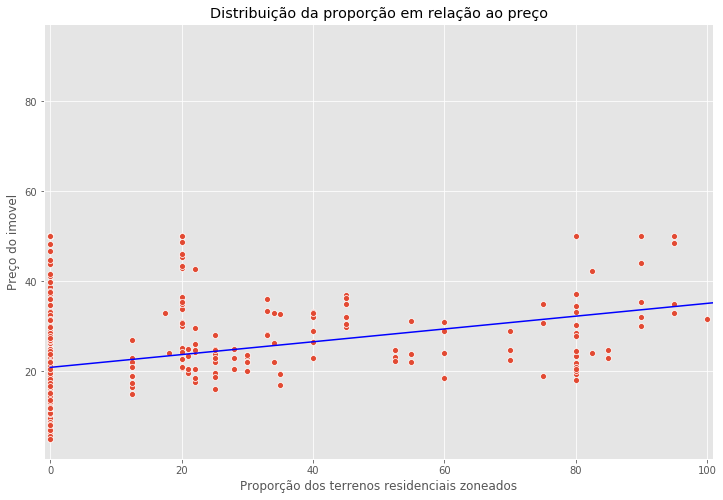

In [48]:
plt.title('Distribuição da proporção em relação ao preço')
sns.scatterplot(x='ProporcaoTerrenosResidZoneados', y='Preco', data=df)
plt.plot(X_new, y_pred, 'b-')
plt.xlabel('Proporção dos terrenos residenciais zoneados')
plt.ylabel('Preço do imovel')
plt.xlim((-1,101))
plt.show()

In [46]:
print('\nErro Medio Quadrado: %s' % mean_squared_error(y, y_pred))
print('\nErro Medio Absoluto: %s' % mean_absolute_error(y, y_pred))


Erro Medio Quadrado: 1783.4891044935614

Erro Medio Absoluto: 34.82982948251364


> A proporção esta relacionada ao preço dos imoveis ?

Analisando a relação existente entre as variaveis podemos notar uma baixa correlação positiva e também notar que o erro médio absoluto apresenta um valor consideravel para a relação entre a feature e o valor predito.